In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
customer_df=pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.head())
display(customer_df.shape)
display(customer_df.dtypes)
display(customer_df.isna().sum())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

DataSet has no nan values => 4.01.12 and 4.02.3 are finished 

In [47]:
#Change format of column names
customer_df.columns=[x.lower() for x in customer_df.columns]
customer_df.columns=[x.replace(' ','_') for x in customer_df.columns]
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:
#Change format of effective_to_date to datetime
from datetime import datetime
customer_df.effective_to_date=customer_df.effective_to_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


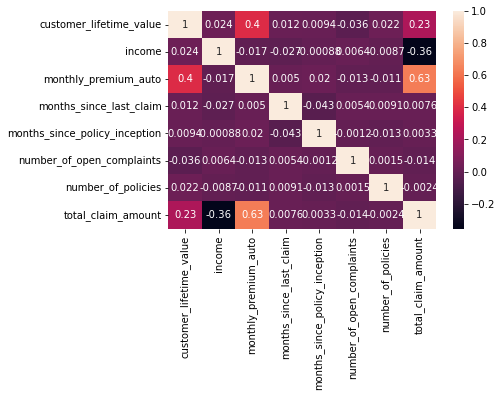

In [49]:
# split between numerics and objects
numerics = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(object)

#get correlation matrix of the numerics 
corr_matrix=numerics.corr()
ig, ax = plt.subplots()
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


-strong correlation between total_claim_amount and monthly_premium_auto

-negative correlations between income and total_claim_amount 

-correlation between total_claim_amount and customer_lifetime_value

-higher correlations between monthly_premium_auto and customer_lifetime_value

In [50]:
# split continuous and discrete variables 
# function make a list of discrete and continous variables
# col is the list of columns and n is the cutoff value which will be used to differ between discrete and continuous values 
# by default n = 10

def con_dis_split(col, n=10):
    con,dis=[],[]
    for x in col:
        if len(numerics[x].unique()) > n:
            con.append(x)
        else:
            dis.append(x)
    return con,dis

con,dis=con_dis_split(numerics.columns)
continuous_df=numerics[con]
discrete_df=numerics[dis]
display(discrete_df.head())
display(continuous_df.head())

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


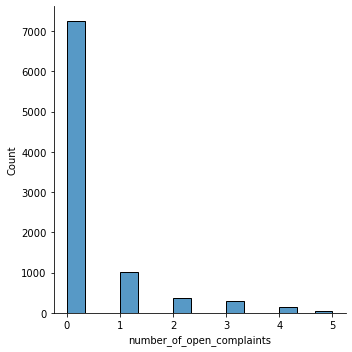

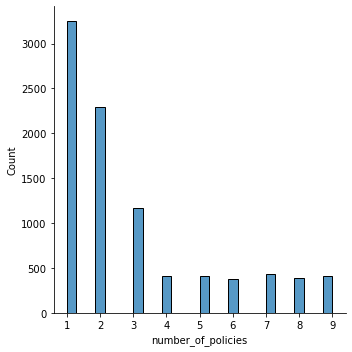

In [51]:
sns.displot(discrete_df.number_of_open_complaints)
plt.show()
sns.displot(discrete_df.number_of_policies)
plt.show()

both discrete variables have the highest count on the smalles value.
tendencie seems to be exponential decreasing (with 450 as asymptode of number_of_policies)

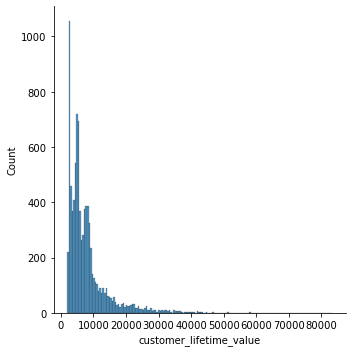

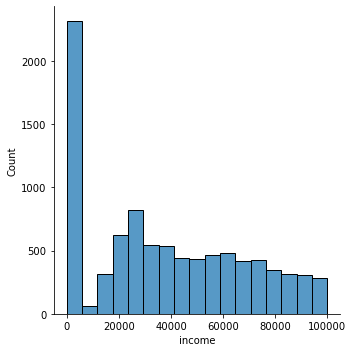

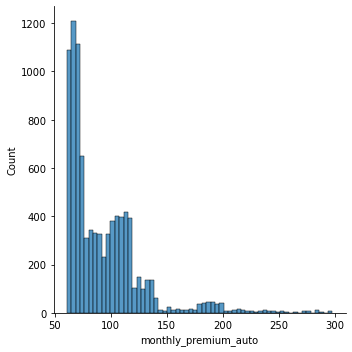

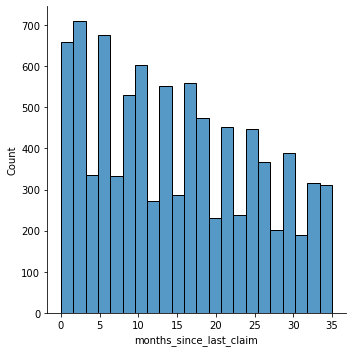

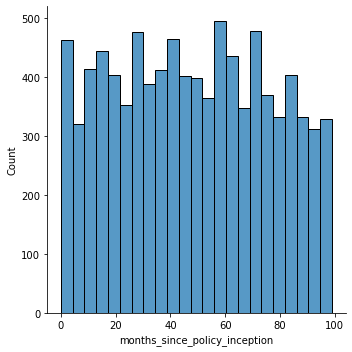

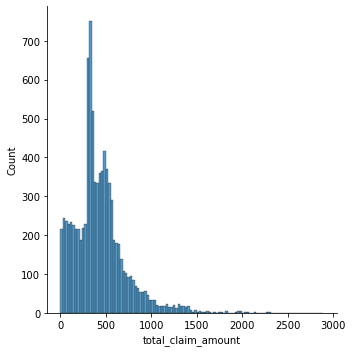

In [52]:
sns.displot(continuous_df.customer_lifetime_value)
plt.show()

sns.displot(continuous_df.income)
plt.show()

sns.displot(continuous_df.monthly_premium_auto)
plt.show()

sns.displot(continuous_df.months_since_last_claim)
plt.show()

sns.displot(continuous_df.months_since_policy_inception)
plt.show()

sns.displot(continuous_df.total_claim_amount)
plt.show()


many customer with a small custome_lifetime_value (< 10000)
a discrete peak at ~4000 could be a result of promotions in the past
counts decreases for bigger custome_lifetime_values

a clear peak of the income counts for income = 0 => customer who does not want to share there income
rest has no clear trend

most people have a monthly premium auto of about 60$ => could be a minimum value for a special giveaway
then for bigger premium auto the number of customers decreases 

the counts of months_since_last_claim decreases. holes in the counts could be the effect of binning a dataset with a small amount of different values. Could be made discrete by devide them in semester (if wanted) 

months_since_policy_inceptions seems humogeneous distributed (can be also be split in years and used as discrete variable)

total_claim_amount has a clear peak at 400 => could be a result of the combination of the peaks of custome_lifetime_values and monthly_premium_auto for bigger total_claim_amounts the distribution decreases

In [53]:
discrete_df['semester_since_last_claim']=continuous_df.months_since_last_claim.apply(lambda x: int(x)//6)
display(discrete_df.semester_since_last_claim.value_counts())
discrete_df['years_since_policy_inception']=continuous_df.months_since_policy_inception.apply(lambda x: int(x)//12)
display(discrete_df.years_since_policy_inception.value_counts())

continuous_df=continuous_df.drop(['months_since_last_claim','months_since_policy_inception'],axis=1)
display(discrete_df.head())

C:\Users\lahrm\AppData\Local\Temp/ipykernel_13860/2768910485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['semester_since_last_claim']=continuous_df.months_since_last_claim.apply(lambda x: int(x)//6)


0    2017
1    1829
2    1670
3    1396
4    1222
5    1000
Name: semester_since_last_claim, dtype: int64

C:\Users\lahrm\AppData\Local\Temp/ipykernel_13860/2768910485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df['years_since_policy_inception']=continuous_df.months_since_policy_inception.apply(lambda x: int(x)//12)


4    1179
3    1169
5    1150
2    1145
1    1129
0    1096
6    1022
7     993
8     251
Name: years_since_policy_inception, dtype: int64

,number_of_open_complaints,number_of_policies,semester_since_last_claim,years_since_policy_inception
0,0,1,5,0
1,0,8,2,3
2,0,2,3,3
3,0,7,3,5
4,0,1,2,3


In [54]:
display(discrete_df.head())

,number_of_open_complaints,number_of_policies,semester_since_last_claim,years_since_policy_inception
0,0,1,5,0
1,0,8,2,3
2,0,2,3,3
3,0,7,3,5
4,0,1,2,3


Looking for outliers 1.customer_lifetime_value

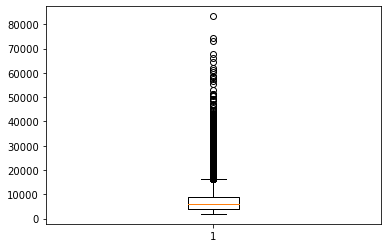

In [55]:
plt.boxplot(continuous_df.customer_lifetime_value)
plt.show()

outliers here are people with a lifetime_value > then 40000
the differences become smaller if we use the logarithm

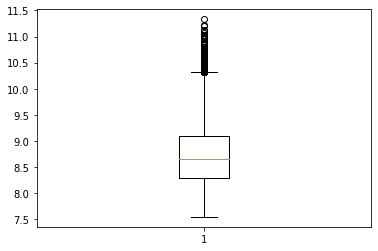

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,customer_lifetime_value_log
0,2763.519279,56274,69,384.811147,7.924260
1,6979.535903,0,94,1131.464935,8.850738
2,12887.431650,48767,108,566.472247,9.464008
3,7645.861827,0,106,529.881344,8.941920
4,2813.692575,43836,73,138.130879,7.942253


In [56]:
continuous_df['customer_lifetime_value_log']=continuous_df.customer_lifetime_value.apply(np.log)

plt.boxplot(continuous_df.customer_lifetime_value_log)
plt.show()
display(continuous_df.head())

2.total_claim_amount

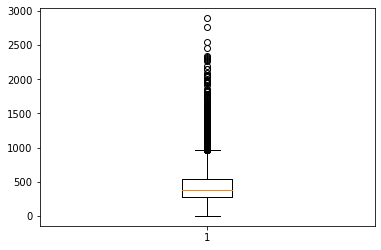

In [57]:
plt.boxplot(continuous_df.total_claim_amount)
plt.show()

Positive outliers are in this case very importent for a insurence company => use the log (no extra treating of amount< 0, all values are positive)

In [58]:
print(continuous_df.total_claim_amount.min())
continuous_df['total_claim_amount_log']=continuous_df.total_claim_amount.apply(np.log)

0.099007


No other outliers

In [59]:
#continuous_df=continuous_df.drop(['customer_lifetime_value','total_claim_amount'],axis=1)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,customer_lifetime_value_log,total_claim_amount_log
0,2763.519279,56274,69,384.811147,7.924260,5.952753
1,6979.535903,0,94,1131.464935,8.850738,7.031268
2,12887.431650,48767,108,566.472247,9.464008,6.339428
3,7645.861827,0,106,529.881344,8.941920,6.272653
4,2813.692575,43836,73,138.130879,7.942253,4.928202


Start with the categoricals

In [60]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [61]:
categorical_df.customer.value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

customer is a unique code for each customer=> to many values for a comprehenision => drop it

In [62]:
categorical_df=categorical_df.drop(['customer'],axis=1)

In [63]:
for x in categorical_df.columns:
    display(categorical_df[x].value_counts())


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

no column has more than 9 values 
`policy_type` could be a summarized version of `policy` (if true drop `policy_type`, assumtion by summing over the different policy types)
`policy` and `renew_offer_type` have numeric and character part. I Keep it


In [64]:
categorical_df['p1']=categorical_df.policy.apply(lambda x: x.split()[0])
categorical_df['p2']=categorical_df.policy_type.apply(lambda x: x.split()[0])
categorical_df[categorical_df.p1 != categorical_df.p2]


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,p1,p2


test shows `policy_type` is a summarized version of `policy` => to simplify drop 'policy' and the auto at the end of each value

In [65]:
categorical_df.policy_type=categorical_df.p1
categorical_df=categorical_df.drop(['p1','p2','policy'],axis=1)


additionally luxury SUV and luxury car could be summerized, but there exist a chance that these differences of cars results in different classes of insurences (especially if these insurences are for cars)

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


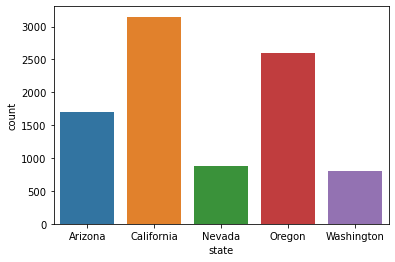

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


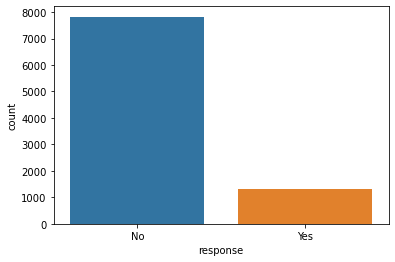

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


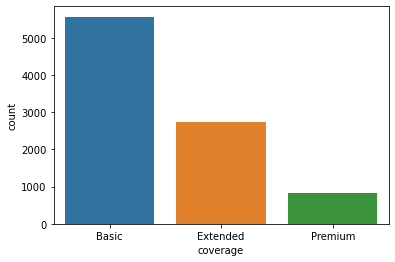

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


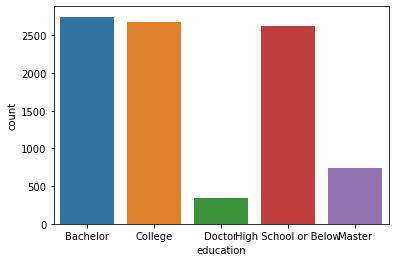

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


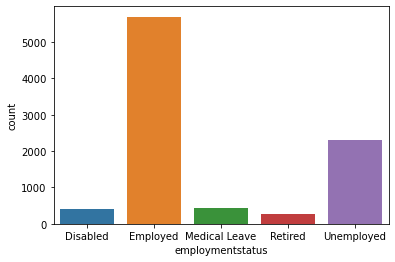

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


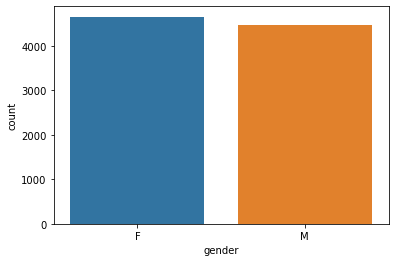

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


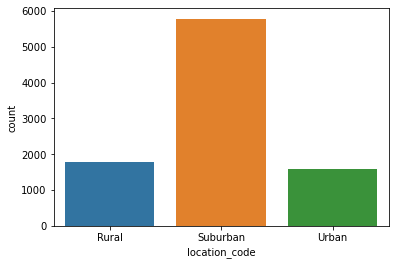

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


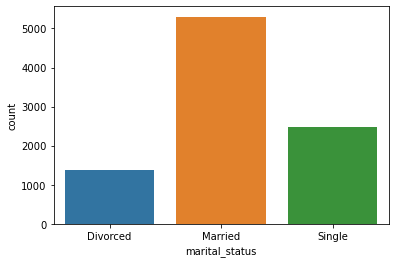

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


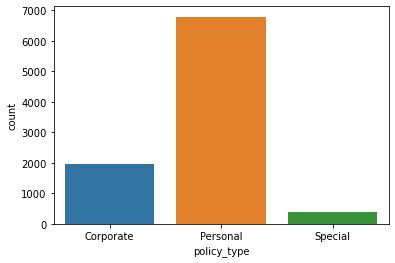

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


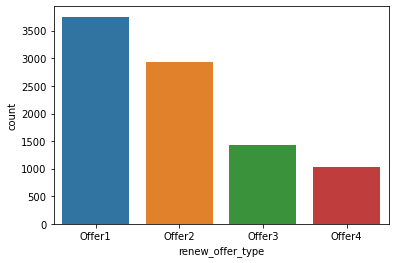

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


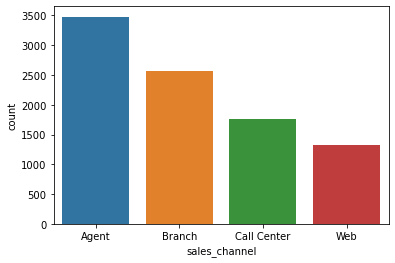

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


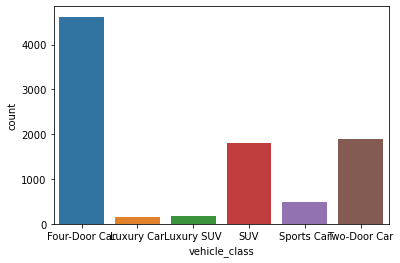

C:\Users\lahrm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


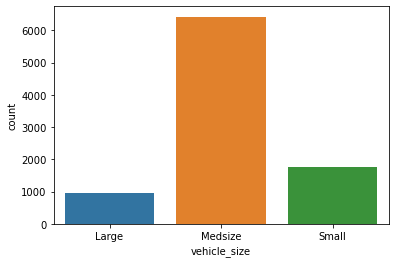

In [66]:
for x in categorical_df.columns:
    sns.countplot(categorical_df[x].sort_values())
    plt.show()
# data will be sorted alphabetically

* all `states` have a comperable order of counts
* the most people does not `response`
* the number of customers decreases with `coverage` value
* `doctors` and `masters` are a little bit underrepresented
* most people asigned them as `employed` or `unemployed` : `medical leave`, `retired` and `disabled` are subcategories of customer => transform them
* the number of males and females have similiar size
* most people are declared as `suburban`, other `location_codes` have a similiar size
* most people are `married`, `divorsed` is a little bit underrepresented
* most people have a `personal policy`, the least a `special` one
* number of `renew_offer_type` decrease with the last digit of the **str**
* most people get the prod over an `agent`, the least used the `web`
* the customers does not have much luxury cars, the most have a `four-door car`
* the most have a `medsize` car 

In [67]:
categorical_df.employmentstatus=categorical_df.employmentstatus.apply(lambda x: np.where(x in ['Employed','Medical Leave'], 'Employed', 'Unemployed'))
categorical_df.employmentstatus.value_counts()

Employed      6130
Unemployed    3004
Name: employmentstatus, dtype: int64

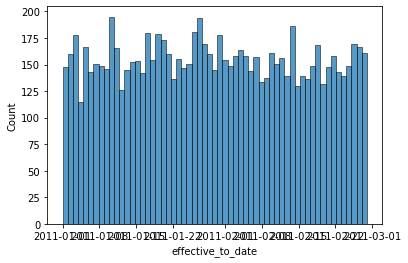

2011-01-01 00:00:00 2011-02-28 00:00:00


In [68]:
sns.histplot(customer_df.effective_to_date,bins=59)
plt.show()

print(customer_df.effective_to_date.min(),customer_df.effective_to_date.max())

* distribution has no clear trend
* min counts and max counts seems to be randomly

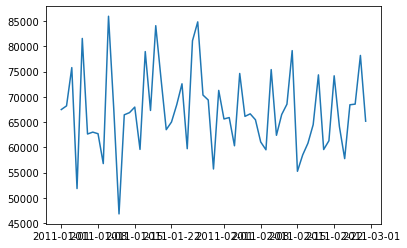

In [69]:
data2=pd.concat([customer_df.effective_to_date, continuous_df.total_claim_amount],axis=1)
ptab=pd.pivot_table(data2, values='total_claim_amount', index='effective_to_date', aggfunc=np.sum)
plt.plot(ptab)

also no clear trend 

# Start combine the data for the model

split categories into normal objects and orderable objects

In [70]:
order_df=categorical_df[['coverage','education','location_code','vehicle_size']]
normal_df=categorical_df.drop(['coverage','education','location_code','vehicle_size'],axis=1)
order_df

,coverage,education,location_code,vehicle_size
0,Basic,Bachelor,Suburban,Medsize
1,Extended,Bachelor,Suburban,Medsize
2,Premium,Bachelor,Suburban,Medsize
3,Basic,Bachelor,Suburban,Medsize
4,Basic,Bachelor,Rural,Medsize
...,...,...,...,...
9129,Basic,Bachelor,Urban,Medsize
9130,Extended,College,Suburban,Medsize
9131,Extended,Bachelor,Suburban,Medsize
9132,Extended,College,Suburban,Large


transform categoricals into numbers using OneHotEncoder/dummies on `normal_df` and a self made lableEncoder on `order_df`

In [71]:
normalt_df=pd.get_dummies(normal_df,drop_first=True)
display(normalt_df.head())
order_df.coverage=order_df.coverage.map({'Basic': 0, 'Extended': 1, 'Premium': 2})
order_df.education=order_df.education.map({'Bachelor': 2, 'College': 1, 'High School or Below': 0, 'Master' : 3, 'Doctor' : 4})
order_df.location_code=order_df.location_code.map({'Rural': 0, 'Suburban': 1, 'Urban': 2})
order_df.vehicle_size=order_df.vehicle_size.map({'Small': 0, 'Medsize': 1,'Large':2})
order_df

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Unemployed,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


C:\Users\lahrm\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,coverage,education,location_code,vehicle_size
0,0,2,1,1
1,1,2,1,1
2,2,2,1,1
3,0,2,1,1
4,0,2,0,1
...,...,...,...,...
9129,0,2,2,1
9130,1,1,1,1
9131,1,2,1,1
9132,1,1,1,2


normalize continuous data

In [72]:

#to be sure two versions of the data: one using log of customer_lifetime_value and total_claim_amount, 2 not
continuous_df1=continuous_df.drop(['customer_lifetime_value','total_claim_amount'],axis=1).copy()
# for testing does not use total_claim_amount_log or customer_lifetime_value_log
continuous_df2=continuous_df.drop(['customer_lifetime_value_log','total_claim_amount_log'],axis=1).copy()
# total claim amount is target value=> not norm
y1=continuous_df1.total_claim_amount_log
y2=continuous_df2.total_claim_amount

X1=continuous_df1.drop('total_claim_amount_log',axis=1)
X2=continuous_df2.drop('total_claim_amount',axis=1)
 #scaling
from sklearn.preprocessing import MinMaxScaler

transformer1=MinMaxScaler().fit(X1)
X1=pd.DataFrame(transformer1.transform(X1), columns=X1.columns)

transformer2=MinMaxScaler().fit(X2)
X2=pd.DataFrame(transformer1.transform(X2), columns=X2.columns)


C:\Users\lahrm\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- customer_lifetime_value
Feature names seen at fit time, yet now missing:
- customer_lifetime_value_log

  warnings.warn(message, FutureWarning)


split time in days and month and merge all together in X 

In [73]:
data2['month']=data2.effective_to_date.apply(lambda x: x.month)
data2['day']=data2.effective_to_date.apply(lambda x: x.day)
data2=data2.drop(['effective_to_date','total_claim_amount'], axis=1)

In [74]:
X1

,income,monthly_premium_auto,customer_lifetime_value_log
0,0.562847,0.033755,0.099340
1,0.000000,0.139241,0.344314
2,0.487763,0.198312,0.506471
3,0.000000,0.189873,0.368424
4,0.438443,0.050633,0.104098
...,...,...,...
9129,0.719547,0.050633,0.664257
9130,0.216081,0.075949,0.129423
9131,0.000000,0.101266,0.385758
9132,0.219452,0.147679,0.364191


In [75]:
X1=pd.concat([data2,order_df,normalt_df,discrete_df,X1],axis=1)
X2=pd.concat([data2,order_df,normalt_df,discrete_df,X2],axis=1)


Creating models

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

LR=LinearRegression()
MLPR200=MLPRegressor()
MLPR1000=MLPRegressor(max_iter=1000)
KNN2=KNeighborsRegressor(n_neighbors=2, weights='distance')
KNN5=KNeighborsRegressor(n_neighbors=5, weights='distance')
KNN10=KNeighborsRegressor(n_neighbors=10, weights='distance')
KNN20=KNeighborsRegressor(n_neighbors=20, weights='distance')
models=[LR,MLPR200,MLPR1000,KNN2,KNN5,KNN10,KNN20]
modeln=['LR','MLPR200','MLPR1000','KNN2','KNN5','KNN10','KNN20']

Create function to test all models at once

In [77]:
from sklearn.model_selection import train_test_split
def all_test(X,y,models,mlist):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    for i in range(len(models)):
        models[i].fit(X_train,y_train)
        print('Score of the', mlist[i], '-model:', models[i].score(X_test,y_test))

Run function for data 1

In [84]:
all_test(X1 ,y1 ,models,modeln)

Score of the LR -model: 0.509062159358336
Score of the MLPR200 -model: 0.7043665765930587
Score of the MLPR1000 -model: 0.7002069634033314
Score of the KNN2 -model: 0.12679801134324575
Score of the KNN5 -model: 0.2657351766740289
Score of the KNN10 -model: 0.29475856191788485
Score of the KNN20 -model: 0.26733473749734393


Run function for data 2

In [85]:
all_test(X2 ,y2 ,models,modeln)

Score of the LR -model: 0.6173324932981525


C:\Users\lahrm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score of the MLPR200 -model: 0.6723697802373609
Score of the MLPR1000 -model: 0.8198519049959713
Score of the KNN2 -model: 0.4613223387893832
Score of the KNN5 -model: 0.545274260528253
Score of the KNN10 -model: 0.5753947937506068
Score of the KNN20 -model: 0.5845422749131031


comments:
* taking the logarithm made the model worse
* if a special function fit the data "well" KNeighbors does not perform better as the function 
* The MLPregressor perform better as the linearregressor
* if the MLPregressor does not reached the maximum convergence, it could help to increase the iteration steps
